# **Amazon Sales Data Analysis**

**Exploratory Data Analysis**

**Step 1: Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**`Step 2: Read dataset`**

In [ ]:
df=pd.read_csv('Amazon_Sale_Report.csv',encoding='latin1')
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


**Step 3: Cleaning Dataset**

In [ ]:
df.shape

(128976, 21)

In [ ]:
df.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,0


In [ ]:
df['ship-state'].nunique()

69

In [ ]:
df['ship-state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'Gujarat', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'Goa', 'MEGHALAYA', 'GOA', 'MANIPUR',
       'TRIPURA', 'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', 'Delhi', nan,
       'ANDAMAN & NICOBAR', 'Punjab', 'Rajshthan', 'Manipur', 'rajasthan',
       'Odisha', 'NL', 'Bihar', 'MIZORAM', 'punjab', 'New Delhi',
       'Rajasthan', 'Punjab/Mohali/Zirakpur', 'Puducherry', 'delhi', 'RJ',
       'Chandigarh', 'orissa', 'LAKSHADWEEP', 'goa', 'PB', 'APO',
       'Arunachal Pradesh', 'AR', 'Pondicherry', 'Sikkim',
       'Arunachal pradesh', 'NAGALA'], dtype=object)

In [ ]:
df['Status'].nunique()

13

In [ ]:
df['Status'].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [ ]:
df['Fulfilment'].unique()

array(['Merchant', 'Amazon'], dtype=object)

In [ ]:
df['Category'].unique()

array(['T-shirt', 'Shirt', 'Blazzer', 'Trousers', 'Perfume', 'Socks',
       'Shoes', 'Wallet', 'Watch'], dtype=object)

In [ ]:
df['Size'].unique()

array(['S', '3XL', 'XL', 'L', 'XXL', 'XS', '6XL', 'M', '4XL', 'Free',
       '5XL'], dtype=object)

In [ ]:
df['Courier Status'].unique()

array(['On the Way', 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [ ]:
df['currency'].unique()

array(['INR', nan], dtype=object)

In [ ]:
df.drop(columns=['New', 'PendingS'], errors='ignore', inplace=True)


In [ ]:
df['currency'].replace('', np.nan, inplace=True)
df['currency'] = df['currency'].fillna('INR')

/tmp/ipython-input-51827021.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['currency'].replace('', np.nan, inplace=True)


In [ ]:
df['Amount'] = df['Amount'].replace('', np.nan)
df['Amount'] = pd.to_numeric(df['Amount']).fillna(0.0)

In [ ]:
df['Qty'] = pd.to_numeric(df['Qty'], errors='coerce').fillna(0).astype(int)

In [ ]:
df['Fulfilment'] = df['Fulfilment'].fillna('Unknown')
df['fulfilled-by'] = df['fulfilled-by'].fillna('Unknown')
df['Courier Status'] = df['Courier Status'].fillna('Unknown')
df['Category'] = df['Category'].fillna('Unknown')
df['Size'] = df['Size'].fillna('Unknown')
df['Status'] = df['Status'].fillna('Unknown')

In [ ]:
print("Data cleaned successfully!")

Data cleaned successfully!


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            128976 non-null  object 
 12  Amount              128976 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [ ]:
df['ship-city'] = df['ship-city'].fillna('Unknown')
df['ship-state'] = df['ship-state'].fillna('Unknown')
df['ship-postal-code'] = df['ship-postal-code'].fillna('Unknown')
df['ship-country'] = df['ship-country'].fillna('Unknown')

In [ ]:
df.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,0


## **1. Sales Overview: Understand the overall sales performance, trends, patterns over time**

In [ ]:
total_sales = df['Amount'].sum()
total_orders=len(df)
total_quantity=df['Qty'].sum()

In [ ]:
print("Total Sales (INR):", round(total_sales, 2))
print("Total Orders is :",total_orders)
print("Total Quantity is :",total_quantity)

Total Sales (INR): 78590170.25
Total Orders is : 128976
Total Quantity is : 116646


In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])


/tmp/ipython-input-3386729631.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


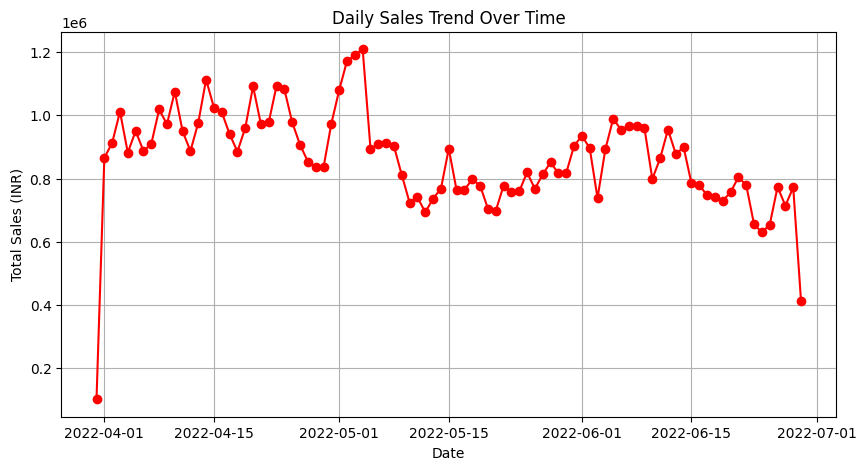

In [ ]:
daily_sales = df.groupby('Date')['Amount'].sum().reset_index() #it group together..like 2024-04-1..combine this date
plt.figure(figsize=(10,5))
plt.plot(daily_sales['Date'], daily_sales['Amount'], color='red', marker='o')
plt.title("Daily Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales (INR)")
plt.grid(True)
plt.show()

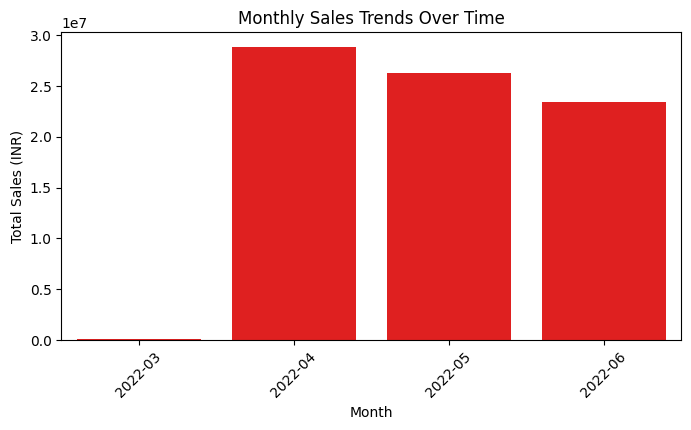

In [ ]:
df['Month'] = df['Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Amount'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x='Month', y='Amount', data=monthly_sales,color='red')
plt.title("Monthly Sales Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales (INR)")
plt.xticks(rotation=45)
plt.show()


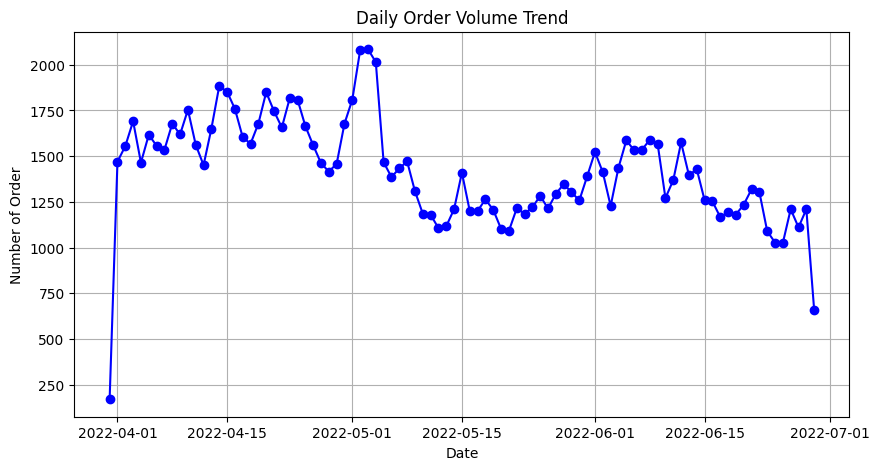

In [ ]:
daily_orders=df.groupby('Date')['Order ID'].count().reset_index()
plt.figure(figsize=(10,5))
plt.plot(daily_orders['Date'], daily_orders['Order ID'],color='Blue', marker='o')
plt.title("Daily Order Volume Trend")
plt.xlabel("Date")
plt.ylabel('Number of Order')
plt.grid(True)
plt.show()


In [ ]:
print("----- SALES OVERVIEW INSIGHTS -----")

print(f"Total Sales: ₹{round(df['Amount'].sum(), 2)}")
print(f"Total Orders: {len(df)}")


print("Highest Sales Date:", df.groupby('Date')['Amount'].sum().idxmax())
print("Lowest Sales Date:", df.groupby('Date')['Amount'].sum().idxmin())


----- SALES OVERVIEW INSIGHTS -----
Total Sales: ₹78590170.25
Total Orders: 128976
Highest Sales Date: 2022-05-04 00:00:00
Lowest Sales Date: 2022-03-31 00:00:00


## **2.** **Product Analysis:** **Analyze the**  **product** **categories, sizes,**  **sold** **to** **identify** **popular**






In [ ]:
Product_sales=df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
print("Total Category by Revenue:",Product_sales.head())



Total Category by Revenue: Category
T-shirt     39206756.65
Shirt       21297770.08
Blazzer     11215104.12
Trousers     5346286.30
Perfume       789419.66
Name: Amount, dtype: float64


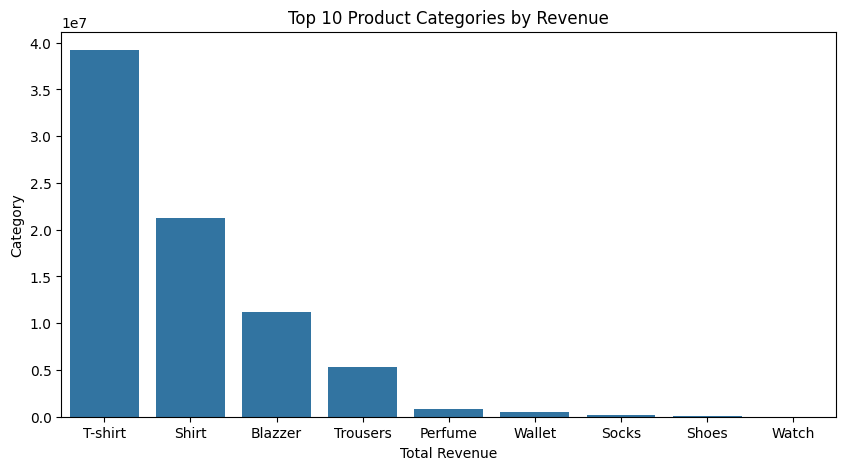

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=Product_sales.index[:10], y=Product_sales.values[:10])
plt.title("Top 10 Product Categories by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Category")
plt.show()

In [ ]:
category_sales=df.groupby('Category')['Qty'].sum().sort_values(ascending=False)
print("Total Category by Quantity sold:",category_sales.head())



Total Category by Quantity sold: Category
T-shirt     45292
Shirt       45044
Blazzer     13943
Trousers     9898
Perfume      1051
Name: Qty, dtype: int64


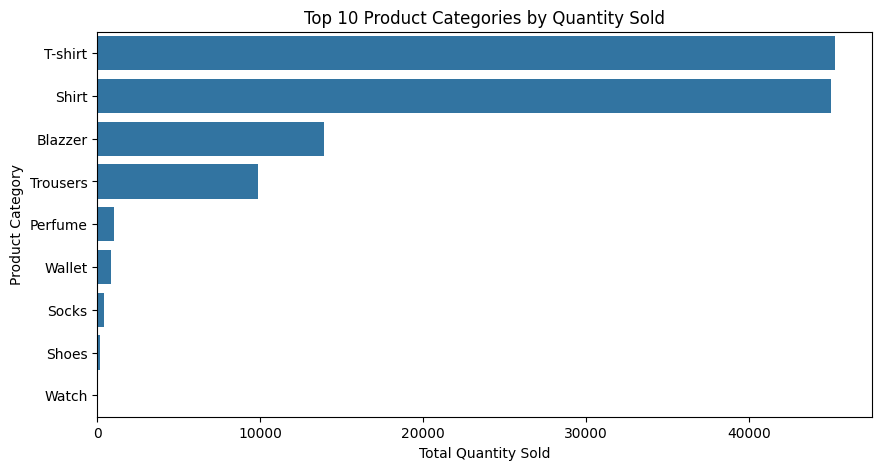

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(y=category_sales.index[:10], x=category_sales.values[:10])
plt.title("Top 10 Product Categories by Quantity Sold")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Category")
plt.show()

In [ ]:
size_sales = df.groupby('Size')['Qty'].sum().sort_values(ascending=False)
print("Top Sizes by Quantity Sold:\n", size_sales.head())

Top Sizes by Quantity Sold:
 Size
M      20138
L      19706
XL     18636
XXL    16246
S      15041
Name: Qty, dtype: int64


/tmp/ipython-input-2217055261.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=size_sales.index[:8], y=size_sales.values[:8], palette='mako')


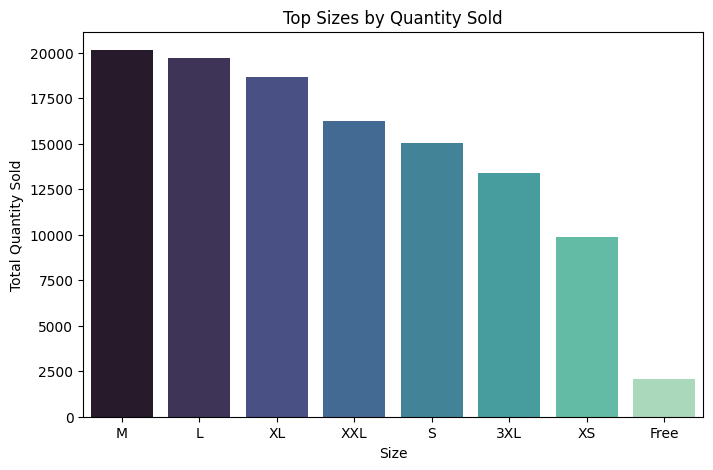

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=size_sales.index[:8], y=size_sales.values[:8], palette='mako')
plt.title("Top Sizes by Quantity Sold")
plt.ylabel("Total Quantity Sold")
plt.xlabel("Size")
plt.show()

In [ ]:

top_category = category_sales.index[0]
top_size = size_sales.index[0]
total_qty = df['Qty'].sum()

print("----- PRODUCT ANALYSIS INSIGHTS -----")
print(f"Top Category: {top_category}")
print(f"Top Size: {top_size}")
print(f"Total Quantity Sold: {total_qty}")
print(f"Trend: {top_category} products in size {top_size} are the most popular among customers.")


----- PRODUCT ANALYSIS INSIGHTS -----
Top Category: T-shirt
Top Size: M
Total Quantity Sold: 116646
Trend: T-shirt products in size M are the most popular among customers.


## **3. Fulfillment Analysis: Investigate the fulfillment methods used and effectiveness in delivering orders**

In [ ]:
df['Fulfilment'].unique()

array(['Merchant', 'Amazon'], dtype=object)

In [ ]:
fulfillment_summary = df.groupby('Fulfilment').agg(
    Total_Orders=('Order ID', 'count'),
    Total_Sales=('Amount', 'sum')
).sort_values(by='Total_Sales', ascending=False)

print("Fulfillment Summary:\n", fulfillment_summary)


Fulfillment Summary:
             Total_Orders  Total_Sales
Fulfilment                           
Amazon             89713  54327540.00
Merchant           39263  24262630.25


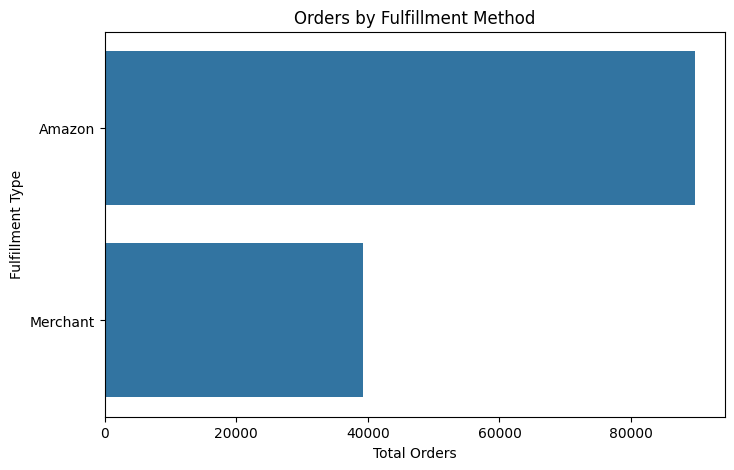

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=fulfillment_summary['Total_Orders'], y=fulfillment_summary.index)
plt.title("Orders by Fulfillment Method")
plt.xlabel("Total Orders")
plt.ylabel("Fulfillment Type")
plt.show()


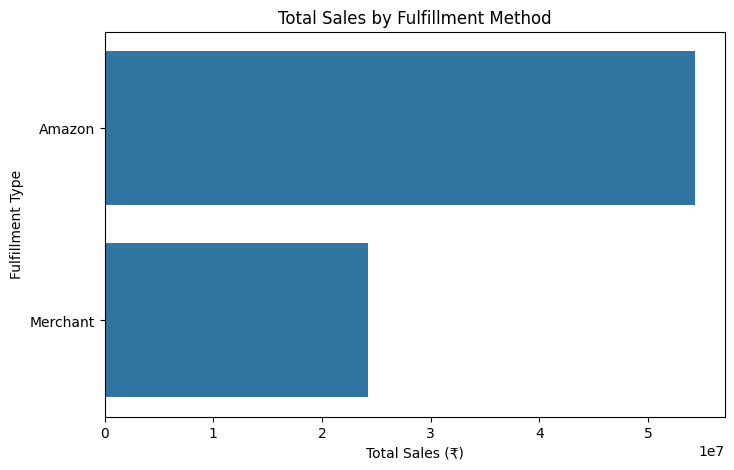

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=fulfillment_summary['Total_Sales'], y=fulfillment_summary.index)
plt.title("Total Sales by Fulfillment Method")
plt.xlabel("Total Sales (₹)")
plt.ylabel("Fulfillment Type")
plt.show()


In [ ]:
courier_status = df.groupby(['Fulfilment', 'Courier Status'])['Order ID'].count().unstack(fill_value=0)
print("Courier Status by Fulfillment Type:\n", courier_status)


Courier Status by Fulfillment Type:
 Courier Status  Cancelled  On the Way  Shipped  Unshipped
Fulfilment                                               
Amazon               5940           0    77617       6156
Merchant                0        6870    31869        524


In [ ]:
# ----- FULFILLMENT ANALYSIS INSIGHTS -----
for method in fulfillment_summary.index:
    total_orders = fulfillment_summary.loc[method, 'Total_Orders']
    total_sales = round(fulfillment_summary.loc[method, 'Total_Sales'], 2)

    print("----- FULFILLMENT ANALYSIS INSIGHTS -----")
    print(f"Fulfillment Method: {method}")
    print(f"Total Orders through {method}: {total_orders}")
    print(f"Total Sales through {method}: ₹{total_sales}")
    print(f"Observation: {method} shows effective performance in managing orders and deliveries.\n")


----- FULFILLMENT ANALYSIS INSIGHTS -----
Fulfillment Method: Amazon
Total Orders through Amazon: 89713
Total Sales through Amazon: ₹54327540.0
Observation: Amazon shows effective performance in managing orders and deliveries.

----- FULFILLMENT ANALYSIS INSIGHTS -----
Fulfillment Method: Merchant
Total Orders through Merchant: 39263
Total Sales through Merchant: ₹24262630.25
Observation: Merchant shows effective performance in managing orders and deliveries.



## **4.Customer Segmentation: Segment customers based on their buying behaviour, location**

In [ ]:
customer_seg = df.groupby('ship-state').agg({
    'Amount': 'sum',
    'Qty': 'sum',
    'Order ID': 'count'
}).reset_index()

customer_seg.rename(columns={'Order ID': 'Total Orders'}, inplace=True)

/tmp/ipython-input-2584115396.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Amount', y='ship-state', data=customer_seg.sort_values('Amount', ascending=False).head(10), palette='plasma')


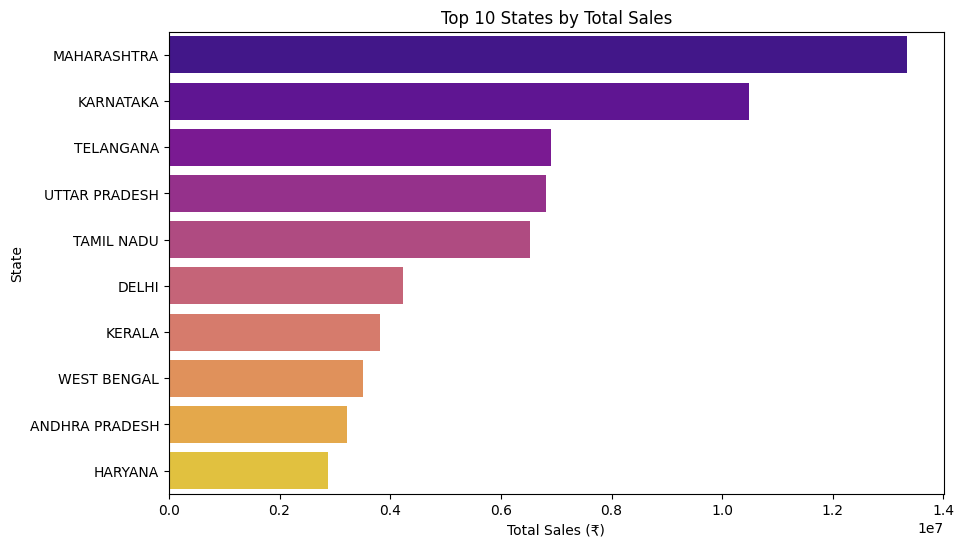

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Amount', y='ship-state', data=customer_seg.sort_values('Amount', ascending=False).head(10), palette='plasma')
plt.title("Top 10 States by Total Sales")
plt.xlabel("Total Sales (₹)")
plt.ylabel("State")
plt.show()

In [ ]:
customer_seg['Customer_Type'] = pd.cut(customer_seg['Amount'],
                                       bins=[0, 20000, 100000, 500000],
                                       labels=['Low', 'Medium', 'High'])

print(customer_seg.sort_values('Amount', ascending=False).head(10))

        ship-state       Amount    Qty  Total Orders Customer_Type
28     MAHARASHTRA  13340333.05  20338         22272           NaN
23       KARNATAKA  10480694.22  15901         17324           NaN
57       TELANGANA   6915018.08  10253         11330           NaN
59   UTTAR PRADESH   6823947.08   9507         10646           NaN
56      TAMIL NADU   6519182.30  10416         11488           NaN
14           DELHI   4232738.97   6151          6778           NaN
24          KERALA   3823559.58   5805          6577           NaN
62     WEST BENGAL   3507212.82   5316          5962           NaN
1   ANDHRA PRADESH   3217859.86   4816          5427           NaN
19         HARYANA   2880355.99   4062          4410           NaN


## **5.Geographical Analysis: Explore the geographical distribution of sales, focusing on states and cities**


/tmp/ipython-input-141004931.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Amount', y='ship-city', data=city_sales.head(10), palette='magma')


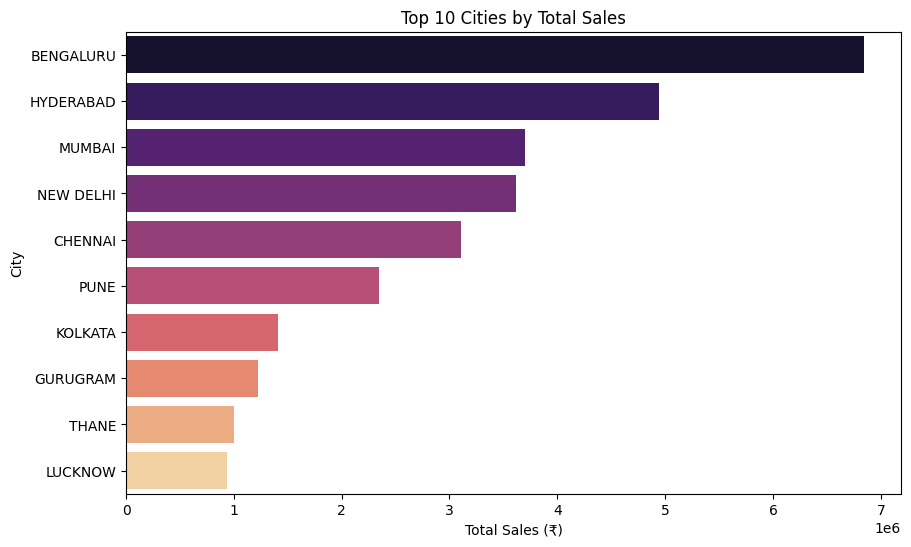

In [ ]:

city_sales = df.groupby('ship-city')['Amount'].sum().reset_index().sort_values('Amount', ascending=False)

# Step 7: Top 10 cities by sales
plt.figure(figsize=(10,6))
sns.barplot(x='Amount', y='ship-city', data=city_sales.head(10), palette='magma')
plt.title("Top 10 Cities by Total Sales")
plt.xlabel("Total Sales (₹)")
plt.ylabel("City")
plt.show()

# **Business Summary Calculations**

In [ ]:

# 1️⃣ Total Sales
total_sales = df['Amount'].sum()

# 2️⃣ Total Orders
total_orders = df['Order ID'].nunique()


# 3️⃣ Average Order Value
avg_order_value = round(total_sales / total_orders, 2)

# 4️⃣ Top State by Sales
top_state = (
    df.groupby('ship-state')['Amount']
    .sum()
    .sort_values(ascending=False)
    .head(1)
)

# 5️⃣ Top Category by Sales
top_category = (
    df.groupby('Category')['Amount']
    .sum()
    .sort_values(ascending=False)
    .head(1)
)

# 6️⃣ Fulfillment Method Summary
fulfillment_summary = (
    df.groupby('Fulfilment')['Amount']
    .sum()
    .sort_values(ascending=False)
    .head(2)
)

# Print Summary
print("----- BUSINESS SUMMARY -----")

print(f"Total Sales: ₹{round(total_sales, 2)}")
print('*'*40)

print(f"Total Orders: {total_orders}")
print('*'*40)

print(f"Average Order Value: ₹{avg_order_value}")
print('*'*40)

print(f"Top State: {top_state.index[0]} (₹{round(top_state.values[0], 2)})")
print('*'*40)

print(f"Top Category: {top_category.index[0]} (₹{round(top_category.values[0], 2)})")
print('*'*40)
print("Fulfillment Performance:")
print(fulfillment_summary)


----- BUSINESS SUMMARY -----
Total Sales: ₹78590170.25
****************************************
Total Orders: 120229
****************************************
Average Order Value: ₹653.67
****************************************
Top State: MAHARASHTRA (₹13340333.05)
****************************************
Top Category: T-shirt (₹39206756.65)
****************************************
Fulfillment Performance:
Fulfilment
Amazon      54327540.00
Merchant    24262630.25
Name: Amount, dtype: float64
